In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import math

In [93]:

def acceleration(v, x, external_force):
    """
    Calculate the acceleration based on the given velocity, position, and external force.
    """
    return external_force - x

def solve_2nd_order_equation(t_max, dt, position_ic, velocity_ic, external_force_func):

    # Time array
    t_values = np.arange(0, t_max, dt)
    
    # Arrays to store solutions
    x_values = np.zeros_like(t_values)
    v_values = np.zeros_like(t_values)
    
    # Set initial conditions
    x_values[0] = position_ic
    v_values[0] = velocity_ic
    
    # Iterative solution using Euler's method
    for i in range(1, len(t_values)):
        # Calculate the external force at this time step
        omega = 0.9
        external_force = math.sin(omega*t_values[i])  # external_force_func(t_values[i-1])
        
        # Calculate acceleration
        a = acceleration(v_values[i-1], x_values[i-1], external_force)
        
        # Update velocity
        v_values[i] = v_values[i-1] + a * dt
        
        # Update position
        x_values[i] = x_values[i-1] + v_values[i] * dt
    
    df = pd.DataFrame({'time': t_values, 'position': x_values, 'velocity': v_values})

    return df

# # Example usage
# def constant_force(t):
#     """
#     Example external force function that provides a constant force.
#     """
#     return 10  # constant force

# Solve the equation with the specified parameters
result = solve_2nd_order_equation(t_max=200,
                                  dt=0.00001,
                                  position_ic=0,
                                  velocity_ic=0,
                                  external_force_func=0)
print(result)


               time      position      velocity
0           0.00000  0.000000e+00  0.000000e+00
1           0.00001  9.000000e-16  9.000000e-11
2           0.00002  3.600000e-15  2.700000e-10
3           0.00003  9.000000e-15  5.400000e-10
4           0.00004  1.800000e-14  9.000000e-10
...             ...           ...           ...
19999995  199.99995 -7.971571e-02 -5.142509e+00
19999996  199.99996 -7.976714e-02 -5.142517e+00
19999997  199.99997 -7.981856e-02 -5.142524e+00
19999998  199.99998 -7.986999e-02 -5.142531e+00
19999999  199.99999 -7.992141e-02 -5.142538e+00

[20000000 rows x 3 columns]


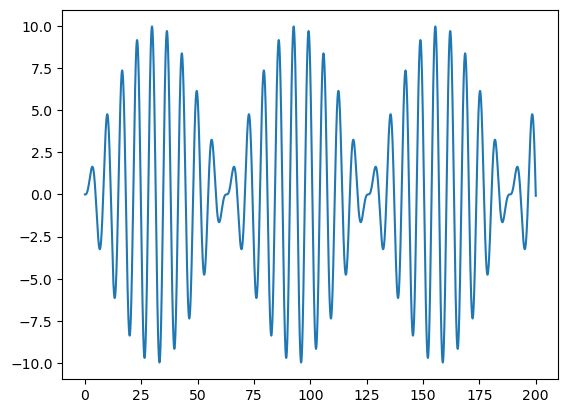

In [94]:
plt.plot(result['time'], result['position'])
plt.show()